In [1]:
!pip install ipywidgets


  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


Import the necessary libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import ipywidgets as widgets
from IPython.display import display


Load the Dataset

In [3]:
def load_data(file_path):
    """Load the dataset from a CSV file."""
    data = pd.read_csv("AmesHousing.csv")
    print(data.head())
    print(data.columns)
    return data


 Preprocess the Data

In [4]:
def preprocess_data(data):
    """Handle missing values and define features and target variable."""
    # Fill missing values with mean for numeric columns
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

    features = ['Lot Area', 'Year Built', 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF']
    target = 'SalePrice'

    # Check for missing features
    missing_features = [feature for feature in features if feature not in data.columns]
    if missing_features:
        print(f"Missing features: {missing_features}")
        return None, None

    X = data[features]
    y = data[target]
    return X, y


Train the Model

In [5]:
def train_model(X, y):
    """Split the data into training and testing sets and train the Ridge Regression model."""
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create polynomial features
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_poly)
    X_test_scaled = scaler.transform(X_test_poly)

    # Train Ridge regression model
    model = Ridge(alpha=1.0)
    model.fit(X_train_scaled, y_train)

    return model, X_test_scaled, y_test, scaler, poly


Evaluate the Model

In [6]:
def evaluate_model(model, X_test, y_test):
    """Make predictions and evaluate the model."""
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')

    # Visualize predictions vs actual values
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel('Actual Sale Price')
    plt.ylabel('Predicted Sale Price')
    plt.title('Actual vs Predicted Sale Price')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
    plt.show()


 Get User Input Using Widgets

In [7]:
def get_user_input():
    """Create a form to collect user input."""

    lot_area = widgets.FloatText(description="Lot Area (sq ft):")
    year_built = widgets.IntText(description="Year Built:")
    overall_qual = widgets.IntSlider(value=5, min=1, max=10, step=1, description="Overall Quality (1-10):")
    gr_liv_area = widgets.FloatText(description="Above Ground Living Area (sq ft):")
    garage_cars = widgets.IntSlider(value=2, min=0, max=4, step=1, description="Garage Spaces:")
    total_bsmt_sf = widgets.FloatText(description="Total Basement Area (sq ft):")

    display(lot_area, year_built, overall_qual, gr_liv_area, garage_cars, total_bsmt_sf)

    button = widgets.Button(description="Submit")
    display(button)

    user_input = {}

    def on_button_clicked(b):
        user_input['Lot Area'] = [lot_area.value]
        user_input['Year Built'] = [year_built.value]
        user_input['Overall Qual'] = [overall_qual.value]
        user_input['Gr Liv Area'] = [gr_liv_area.value]
        user_input['Garage Cars'] = [garage_cars.value]
        user_input['Total Bsmt SF'] = [total_bsmt_sf.value]

        print("User input collected successfully!")

    button.on_click(on_button_clicked)

    return user_input


Make a Prediction Based on User Input

In [8]:
def make_prediction(model, scaler, poly, input_data):
    """Make prediction based on user input."""
    input_df = pd.DataFrame(input_data)

    # Generate polynomial features
    input_poly = poly.transform(input_df)
    input_scaled = scaler.transform(input_poly)

    predicted_price = model.predict(input_scaled)
    print(f"Predicted Sale Price: ${predicted_price[0]:,.2f}")


Main Function to Run the Process

In [9]:
def main():
    """Main function to run the script."""
    file_path = "AmesHousing.csv"  # Update this with the actual file path
    data = load_data(file_path)

    X, y = preprocess_data(data)
    if X is not None and y is not None:
        model, X_test, y_test, scaler, poly = train_model(X, y)
        evaluate_model(model, X_test, y_test)

        print("Please provide your property details:")
        input_data = get_user_input()  # Get user input via widgets

        # Wait until the user submits the form before making a prediction
        while not input_data:
            pass

        make_prediction(model, scaler, poly, input_data)


Run the Main Function

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

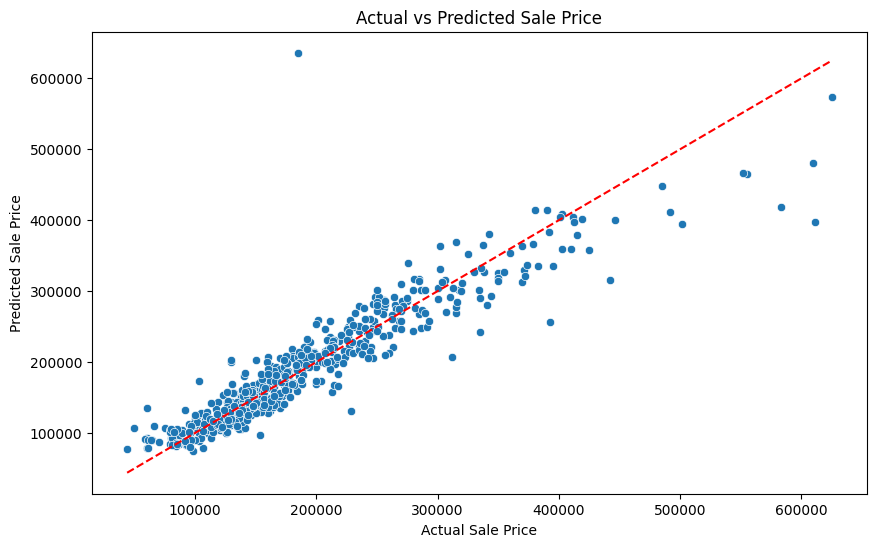

Please provide your property details:


FloatText(value=0.0, description='Lot Area (sq ft):')

IntText(value=0, description='Year Built:')

IntSlider(value=5, description='Overall Quality (1-10):', max=10, min=1)

FloatText(value=0.0, description='Above Ground Living Area (sq ft):')

IntSlider(value=2, description='Garage Spaces:', max=4)

FloatText(value=0.0, description='Total Basement Area (sq ft):')

Button(description='Submit', style=ButtonStyle())

In [ ]:
if __name__ == "__main__":
    main()
